## Highway Environment
https://highway-env.readthedocs.io/en/latest/index.html

This library provides various environments which help in decision-making while doing Autonomous Driving. This library contains multiple environments which simulates various driving situations like Parking, Intersection manuvaering, Highway driving, Roundabouts etc. 


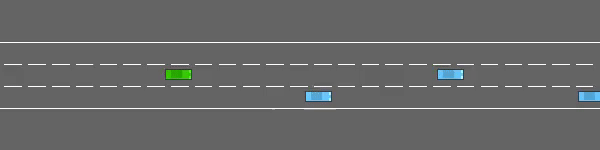

### Actions


For Highway Environments, **we have 3 tyoes of actions sets**:
1. **Countinuous Actions:**
The ContinuousAction type allows the agent to directly set the low-level controls of the vehicle kinematics, namely the throttle 
 and steering angle.
 a Separate config is there, to enable or disable Lat/Long based movements.
 More details here: https://highway-env.readthedocs.io/en/latest/actions/index.html

 This setup is not suitable for Q-value based methods such as DQN.

2. **Discrete Actions**
In this setting, a uniform quantization is done for the countinuous values. The step size is decided by *actions_per_axis* config option.
3. **Discrete Meta Actions**
In this settng, we have a total of 5 Actions, namely:  
        0: 'LANE_LEFT',
        1: 'IDLE',
        2: 'LANE_RIGHT',
        3: 'FASTER',
        4: 'SLOWER'
    
This helps in selecting an action while working with Q-value based methods.
These are abstractions over the countinuous actions and are most suitable for the Questions at hand.


### States

For all environments, several types of observations can be used. They are defined in the observation module. Each environment comes with a default observation, which can be changed or customised using environment configurations. 


---



```
   from matplotlib import pyplot as plt
   %matplotlib inline
config = {
       "observation": {
           "type": "GrayscaleObservation",
           "observation_shape": (128, 64),
           "stack_size": 4,
           "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
           "scaling": 1.75,
       },
       "policy_frequency": 2
   }
   env.configure(config)
   obs, info = env.reset()

   fig, axes = plt.subplots(ncols=4, figsize=(12, 5))
   for i, ax in enumerate(axes.flat):
       ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
   plt.show()
```



---
We have a total of 4 observation types: Greyscaleimage, occupancygrid, timetocollision, Kinemtics. 
https://highway-env.readthedocs.io/en/latest/observations/index.html


### Rewards
Thus, the reward function is often composed of a velocity term and a collision term:

 
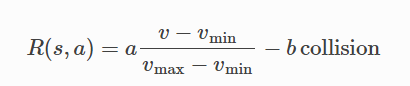
where v, vmin, vmax are the current, minimum and maximum speed of the ego-vehicle respectively.

In parking environment, the goal settings are  a bit different. More details can be found here. 
https://highway-env.readthedocs.io/en/latest/rewards/index.html

In [ ]:
# import gymnasium as gym

# env = gym.make("highway-v0")

# done = truncated = False
# while not (done or truncated):
#     action = ... # Your agent code here
#     obs, reward, done, truncated, info = env.step(action)
#     env.render()

## Intersection Environment

[link text](https:// [link text](https:// [link text](https:// [link text](https:// [link text](https:// [link text](https://))))))
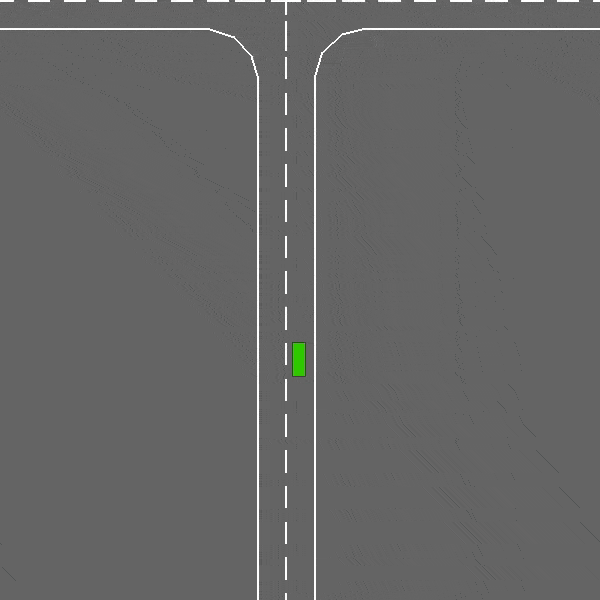

https://highway-env.readthedocs.io/en/latest/environments/intersection.html
An intersection scenario with dense traffic, Green is the agent, which needs to cross the intersection when the road is clear




Default configuration  for interaction environment

```
{
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 15,
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20],
        },
        "absolute": True,
        "flatten": False,
        "observe_intentions": False
    },
    "action": {
        "type": "DiscreteMetaAction",
        "longitudinal": False,
        "lateral": True
    },
    "duration": 13,  # [s]
    "destination": "o1",
    "initial_vehicle_count": 10,
    "spawn_probability": 0.6,
    "screen_width": 600,
    "screen_height": 600,
    "centering_position": [0.5, 0.6],
    "scaling": 5.5 * 1.3,
    "collision_reward": IntersectionEnv.COLLISION_REWARD,
    "normalize_reward": False
}
```



## Intersection environment 
A: Solving Intersection environment by Training 3 Algorithms DQN, DDQN, PER DQN for Intersection Environment. Plot the graphs for the average reward per episode, Average Q value and absolute value error.

Performing the training till convergence or 10000 episodes.

B: Evaluating the environment for 150 episodes and plotting the above mentioned metrics.

C: Comparing the results of different algorithms for the task and the performance of these alogithms. Recording the total time taken by these algorithms to train for 1000 episodes.

#### Installing and importing

In [1]:
!pip install highway-env
!pip install gymnasium
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 46.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random
import tensorflow as tf

### CODE:

In [3]:
# connected gpu
!nvidia-smi

Fri Apr 14 21:25:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# defining the common functions in DQN, DDQN PERDQN

from collections import deque
# function to initialize replay memory
def make_replay_mem(repaly_mem_size):
  D = deque(maxlen=repaly_mem_size)
  return D

# defining the neural netowrk architecture
def makeDQN(num_actions):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(22, activation='relu'),
      tf.keras.layers.Dense(22, activation='relu'),
      tf.keras.layers.Dense(num_actions)
  ])
  return model

def action_select(env, epsilon, actionVal_model, state):
  num_actions = env.action_space.n
  prob = np.random.uniform(0,1)
  if prob>epsilon :
    action = np.random.randint(0,num_actions)
  else:
    action = np.argmax(actionVal_model.predict(state, verbose=0)[0])
    
  return int(action)

def preprocess_state(state):
  new_state = state.reshape(1,-1)
  return new_state

def avg_rew_per_ep(reward_per_ep):
  avg_reward_per_ep = []
  for i in range(len(reward_per_ep)):
    r = 0
    for j in range(0,i):
      r = r+ reward_per_ep[j]
    r = r/(i+1)
    avg_reward_per_ep.append(r)
  return avg_reward_per_ep

#### DQN BGD

In [15]:
# DQN with Batch gradient descent
def DQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C ):

  # inintailizing replay memory
  D = make_replay_mem(replay_mem_size)

  #initializing model for action-value function Q
  # & randomly initializing weights
  actionVal_model = makeDQN(num_actions)
  actionVal_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

  #initializing model for TARGET action-value function Q
  # & randomly initializing weights
  target_model = makeDQN(num_actions)
  target_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

  s_initial,_ = env.reset()
  s_1 = preprocess_state(s_initial)
  actionVal_model.build(input_shape=np.shape(s_1))
  target_model.build(input_shape=np.shape(s_1))

  error = []
  reward_per_ep = []
  for episode in range(0, num_episodes):
    s_initial,_ = env.reset()
    state = preprocess_state(s_initial) # flattening 
    terminated, truncated = False, False
    episode_num = 0
    err = 0
    reward_in_ep = 0
    
    while (terminated == False) & (truncated == False):
      episode_num += 1
      action = action_select(env, epsilon, actionVal_model, state)
      s_next, r, terminated, truncated, info= env.step(action)
      s_next = preprocess_state(s_next)
      D.append((state, action, r, s_next, terminated))
      reward_in_ep += r
      
      # sampling random mininbatch of transitions from D
      if ( len(D) > batch_size ):
        
        minibatch = random.sample(D,batch_size)
        yj = []
        i_state=np.array([sample[0] for sample in minibatch]).squeeze()
        i_action=np.array([sample[1] for sample in minibatch])
        i_reward=np.array([sample[2] for sample in minibatch])
        i_nextstate=np.array([sample[3] for sample in minibatch]).squeeze()
        i_done=np.array([sample[4] for sample in minibatch])
        max_a =  np.max(target_model.predict(i_nextstate, verbose=0), axis=1)
        yj = i_reward + gamma*max_a
        yj[np.where(i_done==True)] = i_reward[np.where(i_done==True)]

        # for j in range(0, batch_size):
        #   done = minibatch[j][4]
        #   if done==True:
        #     # yj.append(minibatch[j][2])
        #     yj[j] = minibatch[j][2]
        #   else:
        #     yj[j] = minibatch[j][2] + gamma*np.max(target_model.predict(minibatch[j][3], verbose=0)[0]) 
        #     # yj.append( minibatch[j][2] + gamma*int(np.max(target_model.predict(minibatch[j][3], verbose=0))) )
        #   i_state[j,:] = minibatch[j][0]
        
        hist = actionVal_model.fit(i_state, yj, epochs=1, batch_size=batch_size, verbose=0)
        err += hist.history['loss'][0]
      
      # resetting target model's every C steps
      if episode_num == C:
        target_model.set_weights(actionVal_model.get_weights())
    reward_per_ep.append(reward_in_ep)
    # print('ep:',episode+1)
    if ( len(D) > batch_size ):
      error.append(err)
  return actionVal_model, error, reward_per_ep

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Time taken: 568.99 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DQN for 250 episodes')

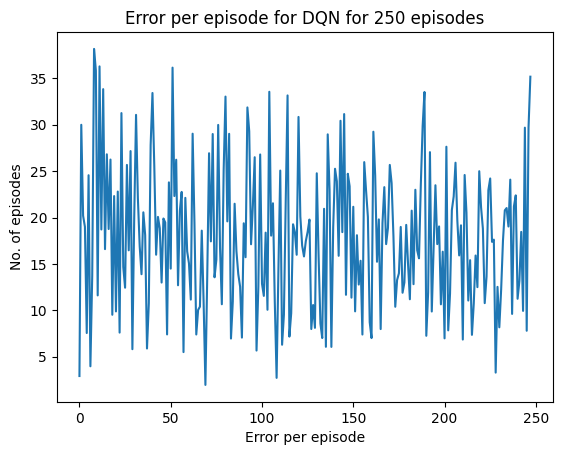

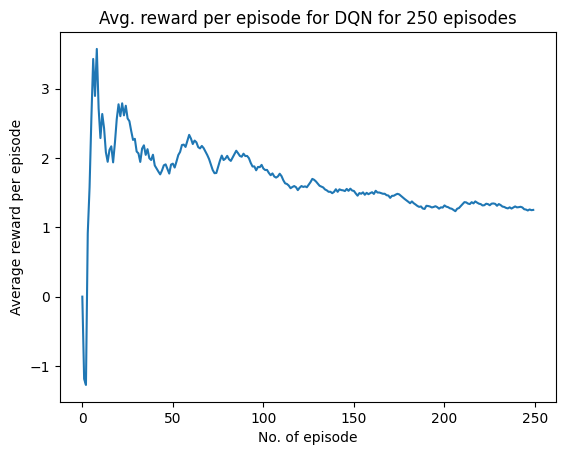

In [ ]:
import time
start_time = time.time()

import gymnasium as gym

env = gym.make("intersection-v0")
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 250
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DQN_train, error_DQN_train, reward_per_ep_DQN_train = DQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DQN_train = avg_rew_per_ep(reward_per_ep_DQN_train)
x = [i for i in range(len(error_DQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DQN for 250 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DQN_train))]
plt.plot(y,avg_reward_per_ep_DQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DQN for 250 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode



Running DQN for 150 episodes

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Time taken: 336.38 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DQN BGD for 150 episodes')

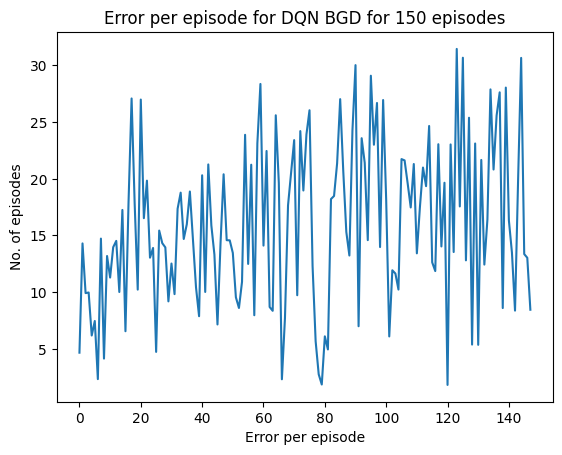

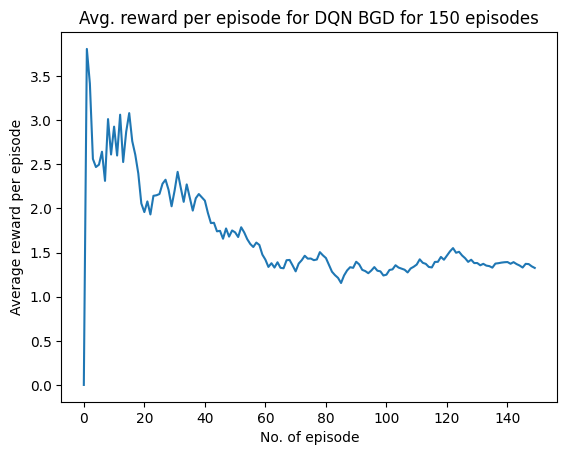

In [ ]:
import time
start_time = time.time()

import gymnasium as gym

env = gym.make("intersection-v0")
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 150
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DQN_train, error_DQN_train, reward_per_ep_DQN_train = DQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DQN_train = avg_rew_per_ep(reward_per_ep_DQN_train)
x = [i for i in range(len(error_DQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DQN BGD for 150 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DQN_train))]
plt.plot(y,avg_reward_per_ep_DQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DQN BGD for 150 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

#### DDQN BGD

In [ ]:
# Implementation of DDQQN with Batch Gradient Descent(BGD)
def DDQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C ):

  # inintailizing replay memory
  D = make_replay_mem(replay_mem_size)

  #initializing model for action-value function Q
  # & randomly initializing weights
  actionVal_model = makeDQN(num_actions)
  actionVal_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

  #initializing model for TARGET action-value function Q
  # & randomly initializing weights
  target_model = makeDQN(num_actions)
  target_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())
  
  s_initial,_ = env.reset()
  s_1 = preprocess_state(s_initial)
  actionVal_model.build(input_shape=np.shape(s_1))
  target_model.build(input_shape=np.shape(s_1))

  error = []
  reward_per_ep = []
  for episode in range(0, num_episodes):
    s_initial,_ = env.reset()
    state = preprocess_state(s_initial) # flattening 
    terminated, truncated = False, False
    episode_num = 0
    err = 0
    reward_in_ep = 0
    
    while (terminated == False) & (truncated == False):
      episode_num += 1
      action = action_select(env, epsilon, actionVal_model, state)
      s_next, r, terminated, truncated, info= env.step(action)
      s_next = preprocess_state(s_next)
      D.append((state, action, r, s_next, terminated))
      reward_in_ep += r
      
      # sampling random mininbatch of transitions from D
      if ( len(D) > batch_size ):
        
        minibatch = random.sample(D,batch_size)
        yj = []
        i_state=np.array([sample[0] for sample in minibatch]).squeeze()
        i_action=np.array([sample[1] for sample in minibatch])
        i_reward=np.array([sample[2] for sample in minibatch])
        i_nextstate=np.array([sample[3] for sample in minibatch]).squeeze()
        i_done=np.array([sample[4] for sample in minibatch])
        max_a =  np.argmax(actionVal_model.predict(i_nextstate, verbose=0), axis=1)
        index_array = [i for i in range(batch_size)]
        qval =  target_model.predict(i_nextstate, verbose=0)[index_array,max_a]
        yj = i_reward + gamma*qval
        yj[np.where(i_done==True)] = i_reward[np.where(i_done==True)]

        hist = actionVal_model.fit(i_state, yj, epochs=1, batch_size=batch_size, verbose=0)
        err += hist.history['loss'][0]
      
      # resetting target model's every C steps
      if episode_num == C:
        target_model.set_weights(actionVal_model.get_weights())
    reward_per_ep.append(reward_in_ep)
    # print('ep:',episode+1)
    if ( len(D) > batch_size ):
      error.append(err)
  return actionVal_model, error, reward_per_ep

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Time taken: 692.10 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DDQN BGD for 250 episodes')

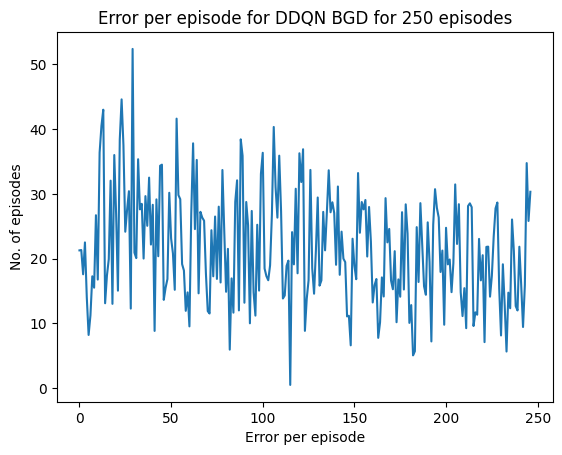

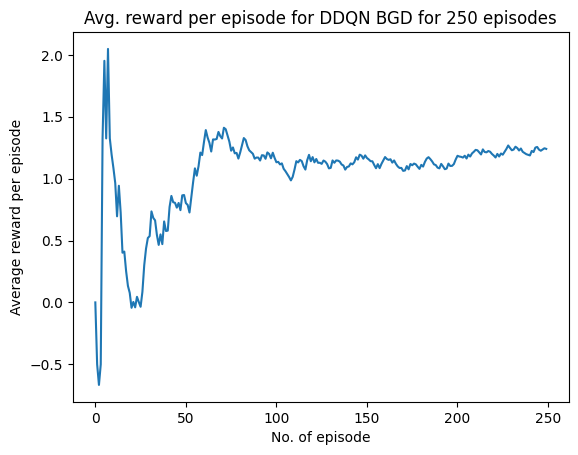

In [ ]:
import time
start_time = time.time()

import gymnasium as gym

env = gym.make("intersection-v0")
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 250
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DDQN_train, error_DDQN_train, reward_per_ep_DDQN_train = DDQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DDQN_train = avg_rew_per_ep(reward_per_ep_DDQN_train)
x = [i for i in range(len(error_DDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DDQN BGD for 250 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DDQN_train))]
plt.plot(y,avg_reward_per_ep_DDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DDQN BGD for 250 episodes')
# while not (done or truncated):
#     action = ... # Your agent code here
#     obs, reward, done, truncated, info = env.step(action)
#     # env.render()

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

Running DDQN for 150 episodes

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Time taken: 470.47 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DDQN for 150 episodes')

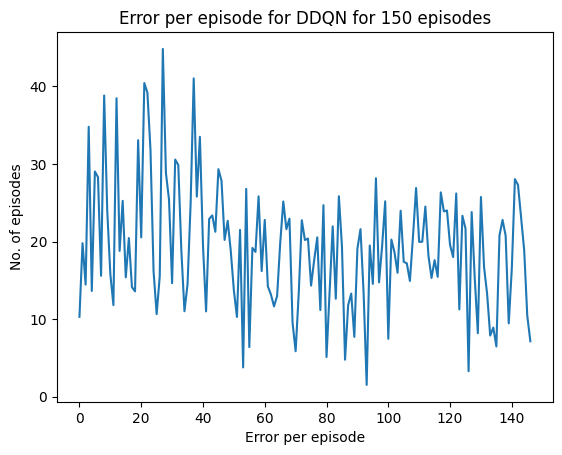

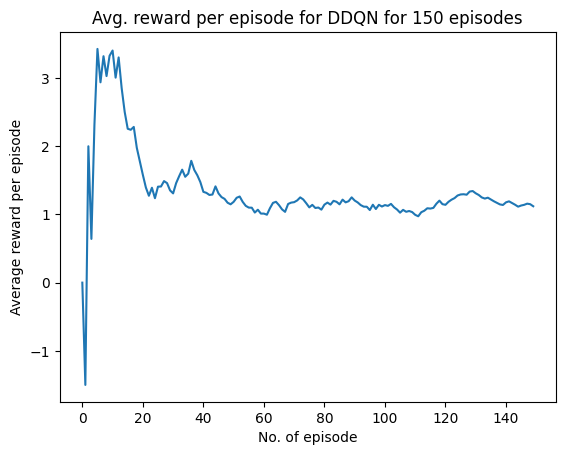

In [ ]:
import time
start_time = time.time()

import gymnasium as gym

env = gym.make("intersection-v0")
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 150
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DDQN_train, error_DDQN_train, reward_per_ep_DDQN_train = DDQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DDQN_train = avg_rew_per_ep(reward_per_ep_DDQN_train)
x = [i for i in range(len(error_DDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DDQN for 150 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DDQN_train))]
plt.plot(y,avg_reward_per_ep_DDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DDQN for 150 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

#### PER DDQN

In [5]:
def PER_DQN(env, batch_size, replay_period, replay_mem_size, alpha, beta, num_episodes, epsilon, C):
  # inintailizing replay memory
  H = make_replay_mem(replay_mem_size)
  priority = []
  # priority = deque(maxlen=replay_mem_size)
  w = np.ones((1,replay_mem_size))
  td_err = np.zeros((1,replay_mem_size))

  #initializing model for action-value function Q
  # & randomly initializing weights
  learning_model = makeDQN(num_actions)
  learning_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

  #initializing model for TARGET action-value function Q
  # & randomly initializing weights
  target_model = makeDQN(num_actions)
  target_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

  s_initial,_ = env.reset()
  s_1 = preprocess_state(s_initial)
  learning_model.build(input_shape=np.shape(s_1))
  target_model.build(input_shape=np.shape(s_1))
  
  reward_per_ep = []
  error = []
  for episode in range(0, num_episodes):
    s_initial,_ = env.reset()
    s_1 = preprocess_state(s_initial) # flattening
    terminated, truncated = False, False
    steps = 0
    err = 0
    reward_in_ep = 0

    while(terminated==False) & (truncated==False):
      steps +=1
      a_1 = action_select(env, epsilon, learning_model, s_1)
      s1, r_1, terminated, truncated, info= env.step(a_1)
      s1 = preprocess_state(s1)
      reward_in_ep += r_1
      a1 = action_select(env, epsilon, learning_model, s1)
      s__1, r1, terminated, truncated, info = env.step(a1)
      s_1 = preprocess_state(s__1)
      H.append((s1, a1, r1, s_1, terminated,s_1, a_1 ))

      if(len(priority) < batch_size):
        priority.append(1)
      else:
        priority.append( np.max(priority) + 1 )

      if (len(H) >= batch_size) & ( steps % replay_period == 0 ):
        minibatch = random.sample(H, batch_size)
        i_state = np.array([sample[0] for sample in minibatch]).squeeze()
        for j in range(batch_size):
          # i = np.argmax( (priority**alpha) / np.sum(priority**alpha) )
          i = np.argmax(priority)
          w[0][j] = (replay_mem_size * priority[j])**((-1)*beta)/np.max(w)
          # print('1:', learning_model.predict(minibatch[j][5], verbose=0)[0][minibatch[j][6]])
          td_err[0][j] =( minibatch[j][2] + 
                      gamma*( target_model.predict(minibatch[j][0], verbose=0)[0][np.argmax(learning_model.predict(minibatch[j][0], verbose=0))] ) 
                      - learning_model.predict(minibatch[j][5], verbose=0)[0][minibatch[j][6]] )
          priority[j] = abs(td_err[0][j])
        
        TD_ERR = td_err[:,0:25]
        W = w[:,0:25]
        # print(np.shape(TD_ERR))
        # print(np.shape(W))
        # print(np.shape(TD_ERR[0]*(W[0])))
        # print(np.shape(i_state))
        hist = learning_model.fit(i_state, TD_ERR[0]*(W[0]), epochs=1, verbose=0 )
        err += hist.history['loss'][0]
      if ((episode) == C):
        target_model.set_weights(learning_model.get_weights())
    reward_per_ep.append(reward_in_ep)

    # print('ep:', episode+1)
    
    if( len(H) > batch_size):
      error.append(err)
  return learning_model, error, reward_per_ep

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Time taken: 924.63 seconds


Text(0.5, 1.0, 'Avg. reward per episode for PERDQN BGD for 250 episodes')

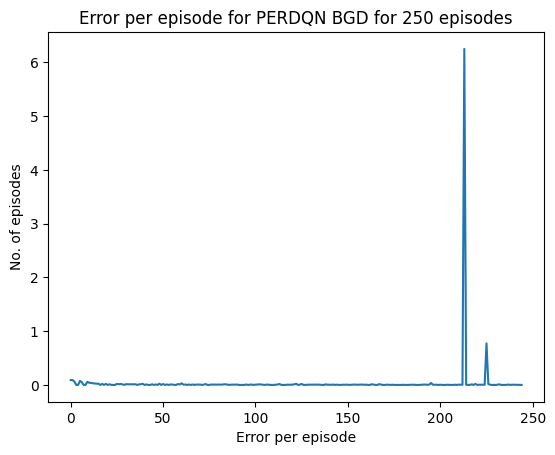

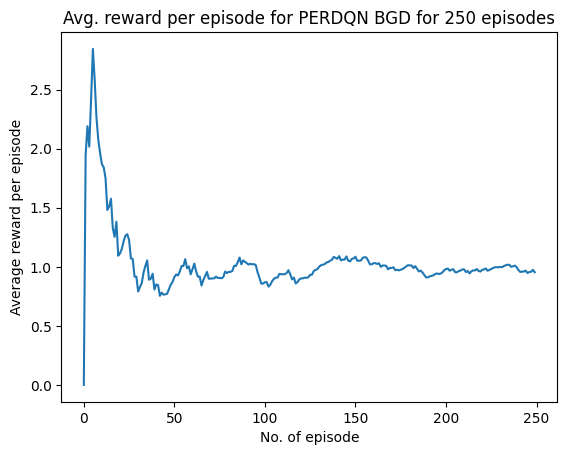

In [ ]:
import time
start_time = time.time()
import gymnasium as gym

env = gym.make("intersection-v0")
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 250
batch_size = 25
gamma = 0.99
replay_period = 5
alpha = 2
beta = 0.5
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_PERDQN_train, error_PERDQN_train, reward_per_ep_PERDQN_train = PER_DQN(env, batch_size, replay_period, replay_mem_size, alpha, beta, num_episodes, epsilon, C)

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_PERDQN_train = avg_rew_per_ep(reward_per_ep_PERDQN_train)
x = [i for i in range(len(error_PERDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_PERDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for PERDQN BGD for 250 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_PERDQN_train))]
plt.plot(y,avg_reward_per_ep_PERDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for PERDQN BGD for 250 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

Running PER DQN for 150 episodes

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Time taken: 533.34 seconds


Text(0.5, 1.0, 'Avg. reward per episode for PERDQN BGD for 150 episodes')

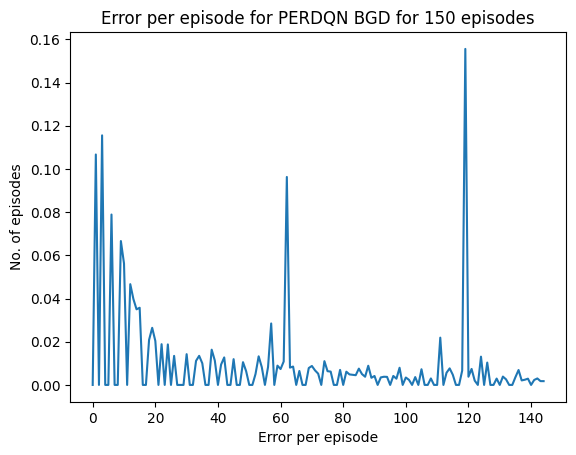

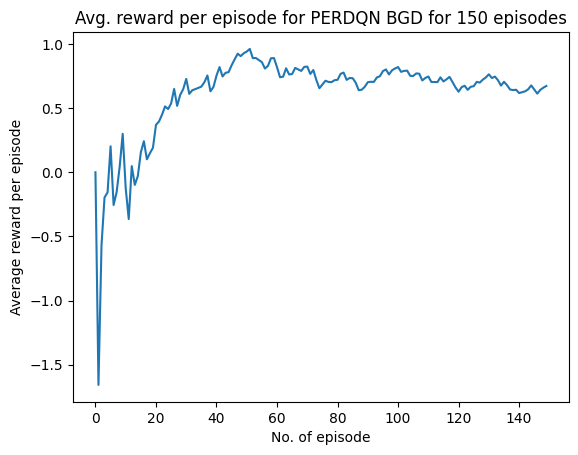

In [ ]:
import time
start_time = time.time()
import gymnasium as gym

env = gym.make("intersection-v0")
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 150
batch_size = 25
gamma = 0.99
replay_period = 5
alpha = 2
beta = 0.5
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_PERDQN_train, error_PERDQN_train, reward_per_ep_PERDQN_train = PER_DQN(env, batch_size, replay_period, replay_mem_size, alpha, beta, num_episodes, epsilon, C)

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_PERDQN_train = avg_rew_per_ep(reward_per_ep_PERDQN_train)
x = [i for i in range(len(error_PERDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_PERDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for PERDQN BGD for 150 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_PERDQN_train))]
plt.plot(y,avg_reward_per_ep_PERDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for PERDQN BGD for 150 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

#### COMMENTS:

*All the algorithms were for 250 episodes only because the reward per episode was converging already and it took a lot of computing time and memory to run it for larger no. of episodes.*

OBSERVATIONS:

1.   DQN:
>* The error per episode keeps fluctuating.
>* The average reward per episode converges to a value between 1.5 and 1.0 (nearly to 1.4). This is seen when DQN is run for 250 episodes. 
>* Time taken:
>> * 150 episodes: 336.38 seconds = 5mins 36.38sec
>> * 250 episodes: 568.99 sec = 9 min 28.99 sec

2.   DDQN:
>* The error per episode keeps fluctuating between 10 and 30.
>* The average reward per episode converges to a value around 1.3. This is also seen when DDQN is run for only for 150 episodes.
>* Time taken:
>>* 250 episodes: 692.10 seconds = 11.5 mins
>>* 150 episodes: 470.47 sec = 7 min 50.47 sec

3.   PER DQN:
>* The error per episode converges to nearly 0 after 80 episodes. There are a few spikes at some places even after converegnce which can be attributed to exploration going on while training.
>* The average reward per episode converges to a value around 1 (this is  seen when PERDQN is run 250 episodes). When run for 150 episodes only, the reward converges to a values mid of 0.5 and 1.
>* Time taken:
>>* 250 episodes: 924.63 seconds = 15.4 mins
>>* 150 episodes: 533.34 sec = 9 mins

INFERENCES:
1. **PER DQN** is the best algorithm in given case bacuase the average error per episode converges and converges to nearly zero. It also has the fastest convergence in terms of **no. of episodes taken to converege**.

2. Order of time taken to train on 250 episodes:
> PER DQN > DQN > DDQN

## Highway Encironment
In this task, the ego-vehicle is driving on a multilane highway populated with other vehicles. The agent’s objective is to reach a high speed while avoiding collisions with neighbouring vehicles. Driving on the right side of the road is also rewarded.

https://highway-env.readthedocs.io/en/latest/environments/highway.html


env = gym.make("highway-v0")

For this task modify the configuration file to use Greyscale observations and discrete meta actions. Increast the number of lanes to 6. Use this link to get more details about configuraiton setup 
https://highway-env.readthedocs.io/en/latest/quickstart.html#configuring-an-environment


## Highway environment
A: Solving the Highway environment by Training 3 Algorithms DQN, DDQN, PER DQN for Intersection Environment. Plotting the graphs for the average reward per episode, Average Q value and absolute value error.

Performing the training till convergence or 10000 episodes.

B: Evaluating the environment for 150 episodes and plot the above mentioned metrics.

C: Comparing the results of different algorithms for the task and the performance of these alogithms. Recording the total time taken by these algorithms to train for 1000 episodes.

D: Changing the observation mode from configuration file to Kinemetics and train DQN for 100 steps. Commenting on the change in the agent's behaviour after this process.

CODES


Changing environment's configuration

In [6]:
import gymnasium as gym
import highway_env

env = gym.make("highway-v0")
env.config['lanes_count']=6
env.config['action']['type']='DiscreteMetaAction'
env.config['observation']['type']='GrayscaleObservation'
env.config['observation']['observation_shape']=(12,6)
env.config['observation']['stack_size']=1 # Will use 4 previous frames as input
env.config['observation']['weights']=[0.2989,0.5870,0.1140]

sizeS=(env.reset()[0].shape[0])*(env.reset()[0].shape[1])

/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


DQN for 250 episodes

Time taken: 3148.56 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DQN for 250 episodes')

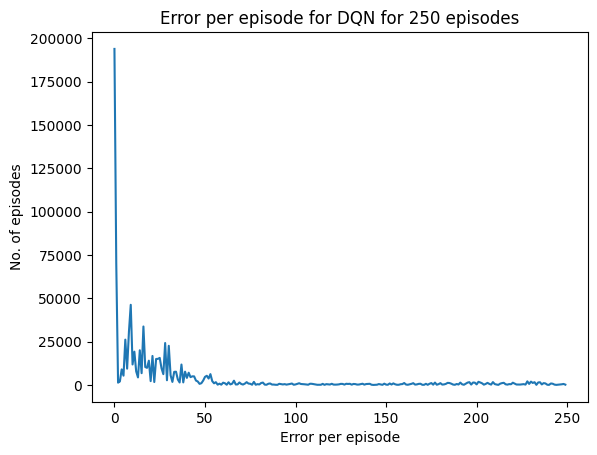

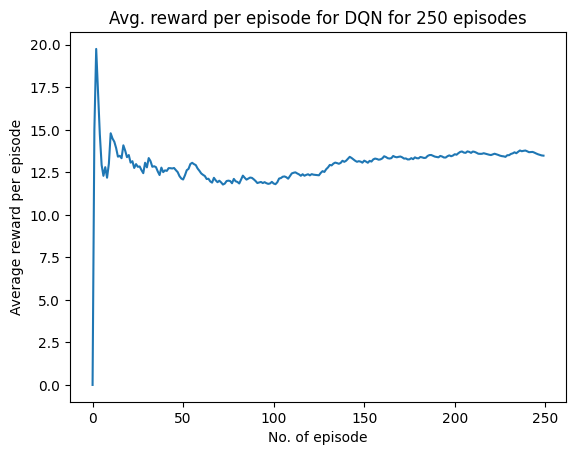

In [ ]:
import time
start_time = time.time()
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 250
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DQN_train, error_DQN_train, reward_per_ep_DQN_train = DQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DQN_train = avg_rew_per_ep(reward_per_ep_DQN_train)
x = [i for i in range(len(error_DQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DQN for 250 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DQN_train))]
plt.plot(y,avg_reward_per_ep_DQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DQN for 250 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

DQN for 150 episodes

Time taken: 1821.62 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DQN BGD for 150 episodes')

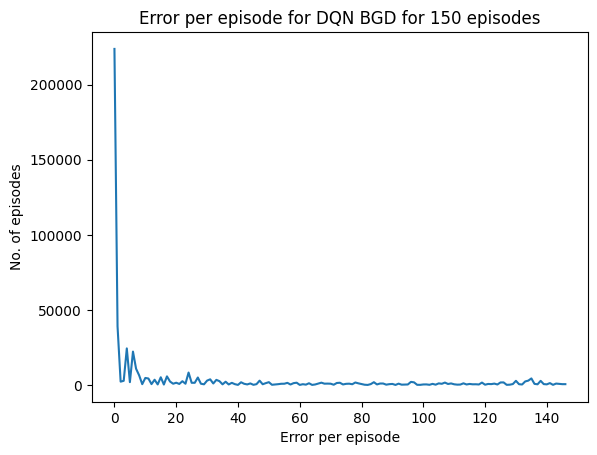

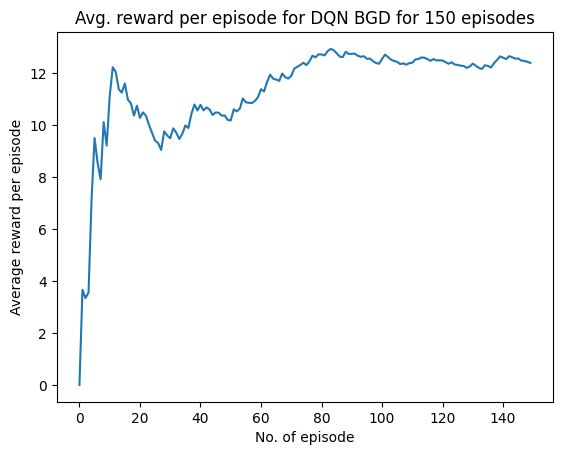

In [ ]:
import time
start_time = time.time()
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 150
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DQN_train, error_DQN_train, reward_per_ep_DQN_train = DQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DQN_train = avg_rew_per_ep(reward_per_ep_DQN_train)
x = [i for i in range(len(error_DQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DQN BGD for 150 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DQN_train))]
plt.plot(y,avg_reward_per_ep_DQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DQN BGD for 150 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

DDQN for 250 episodes

Time taken: 3108.71 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DDQN BGD for 250 episodes')

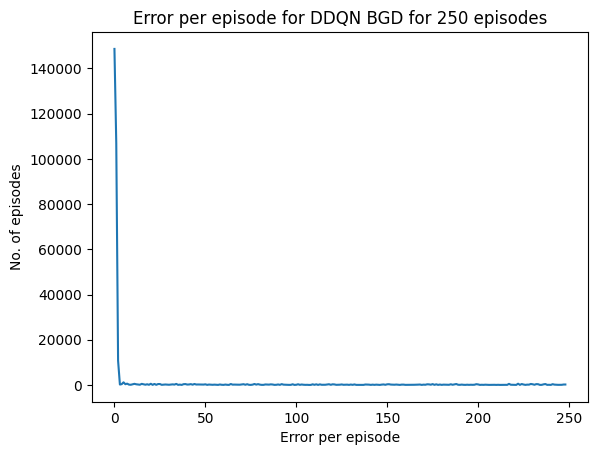

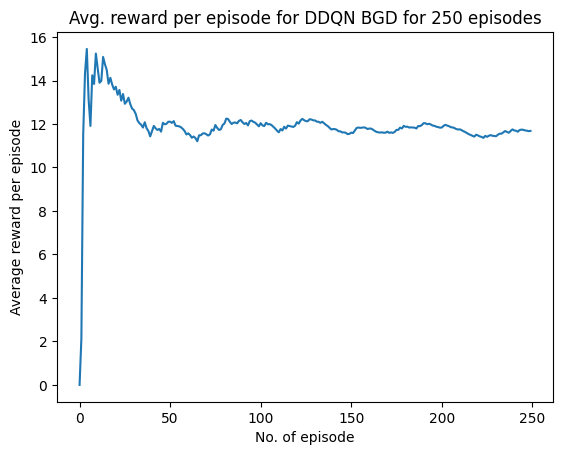

In [ ]:
import time
start_time = time.time()

replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 250
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DDQN_train, error_DDQN_train, reward_per_ep_DDQN_train = DDQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DDQN_train = avg_rew_per_ep(reward_per_ep_DDQN_train)
x = [i for i in range(len(error_DDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DDQN BGD for 250 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DDQN_train))]
plt.plot(y,avg_reward_per_ep_DDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DDQN BGD for 250 episodes')
# while not (done or truncated):
#     action = ... # Your agent code here
#     obs, reward, done, truncated, info = env.step(action)
#     # env.render()

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

DDQN for 150 episodes

Time taken: 2335.32 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DDQN for 150 episodes')

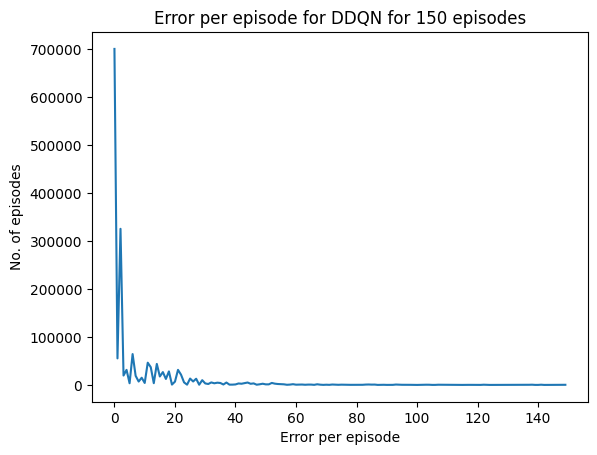

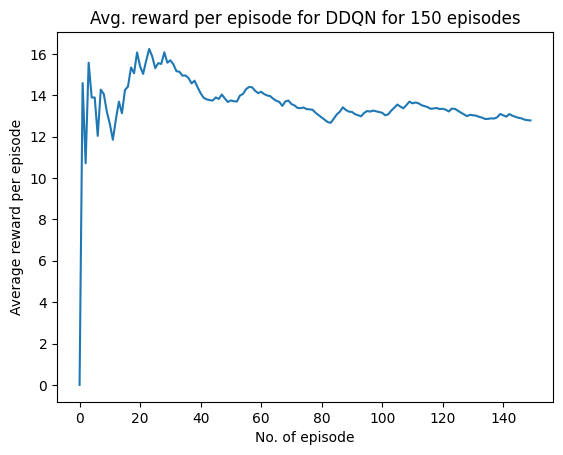

In [ ]:
import time
start_time = time.time()
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 150
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DDQN_train, error_DDQN_train, reward_per_ep_DDQN_train = DDQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DDQN_train = avg_rew_per_ep(reward_per_ep_DDQN_train)
x = [i for i in range(len(error_DDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for DDQN for 150 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DDQN_train))]
plt.plot(y,avg_reward_per_ep_DDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DDQN for 150 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

PER DQN for 250 episodes

Time taken: 4156.42 seconds


Text(0.5, 1.0, 'Avg. reward per episode for PERDQN BGD for 250 episodes')

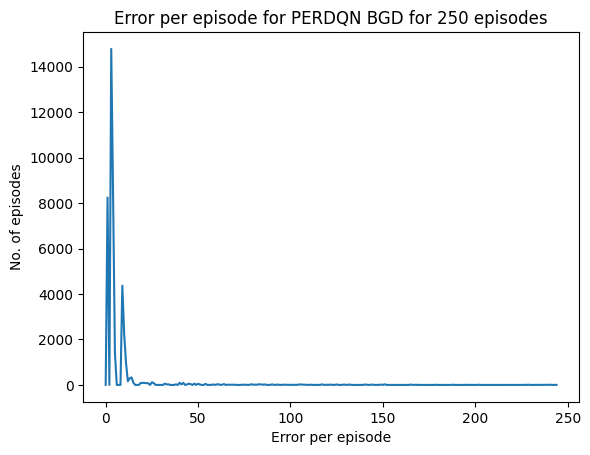

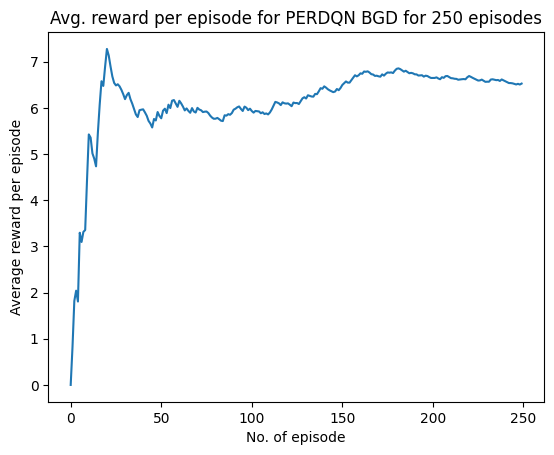

In [ ]:
import time
start_time = time.time()
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 250
batch_size = 25
gamma = 0.99
replay_period = 5
alpha = 2
beta = 0.5
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_PERDQN_train, error_PERDQN_train, reward_per_ep_PERDQN_train = PER_DQN(env, batch_size, replay_period, replay_mem_size, alpha, beta, num_episodes, epsilon, C)

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_PERDQN_train = avg_rew_per_ep(reward_per_ep_PERDQN_train)
x = [i for i in range(len(error_PERDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_PERDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for PERDQN BGD for 250 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_PERDQN_train))]
plt.plot(y,avg_reward_per_ep_PERDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for PERDQN BGD for 250 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

PER DQN for 150 episodes

In [ ]:
import time
start_time = time.time()

replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 150
batch_size = 25
gamma = 0.99
replay_period = 5
alpha = 2
beta = 0.5
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_PERDQN_train, error_PERDQN_train, reward_per_ep_PERDQN_train = PER_DQN(env, batch_size, replay_period, replay_mem_size, alpha, beta, num_episodes, epsilon, C)

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_PERDQN_train = avg_rew_per_ep(reward_per_ep_PERDQN_train)
x = [i for i in range(len(error_PERDQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_PERDQN_train)
plt.xlabel('Error per episode')
plt.ylabel('No. of episodes')
plt.title('Error per episode for PERDQN for 150 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_PERDQN_train))]
plt.plot(y,avg_reward_per_ep_PERDQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for PERDQN for 150 episodes')

**NOTE**: In the first graph above, the labels of x & y-axis are incorrect. 

Correct labels: 
> x-axis - No. of episodes

> y-axis - Error per episode

D

In [17]:
import gym
import highway_env
import gymnasium as gym

env = gym.make("highway-v0")
# env.config['lanes_count']=6
# env.config['action']['type']='DiscreteMetaAction'
# env.config['observation']['type']='KinematicsObservation'
# env.config['observation']['features'] = ["presence", "x", "y", "vx", "vy"]
# env.config['observation']['stack_size']=1 # Will use 4 previous frames as input

# sizeS = env.reset()[0].shape[0] * env.reset()[0].shape[1]

/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


Running DQN for 100 episodes

Time taken: 1117.84 seconds


Text(0.5, 1.0, 'Avg. reward per episode for DQN for 100 episodes')

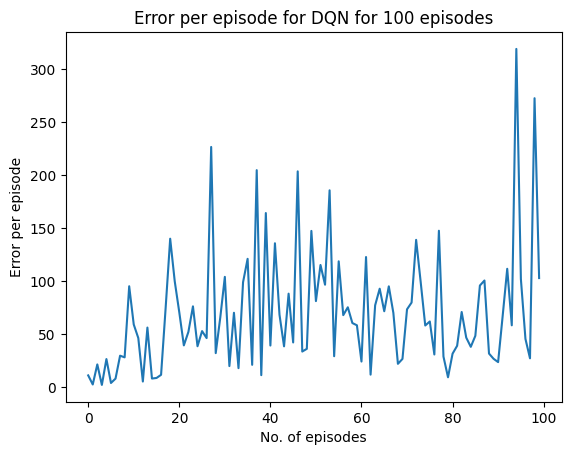

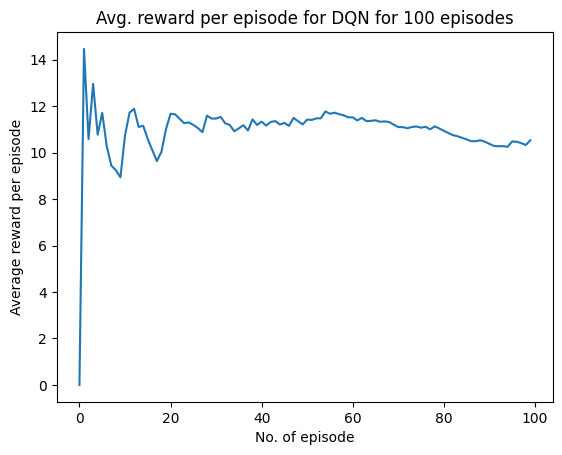

In [18]:
import time
start_time = time.time()
replay_mem_size = 10000
epsilon = 0.1
num_actions = env.action_space.n
num_episodes = 100
batch_size = 25
gamma = 0.99
C = 5 # no. of steps after which actionVal_model = target_model
actionVal_model_DQN_train, error_DQN_train, reward_per_ep_DQN_train = DQN_BGD(env, replay_mem_size,epsilon, num_actions, num_episodes, batch_size, gamma, C )

end_time = time.time()
total_time = end_time - start_time
print("Time taken: {:.2f} seconds".format(total_time))

avg_reward_per_ep_DQN_train = avg_rew_per_ep(reward_per_ep_DQN_train)
x = [i for i in range(len(error_DQN_train))]
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x,error_DQN_train)
plt.ylabel('Error per episode')
plt.xlabel('No. of episodes')
plt.title('Error per episode for DQN for 100 episodes')

plt.figure()
y = [i for i in range(len(avg_reward_per_ep_DQN_train))]
plt.plot(y,avg_reward_per_ep_DQN_train)
plt.xlabel('No. of episode')
plt.ylabel('Average reward per episode')
plt.title('Avg. reward per episode for DQN for 100 episodes')

*All the algorithms were for 250 episodes only because the reward per episode was converging already and it took a lot of computing time and memory to run it for larger no. of episodes.*

OBSERVATIONS:

1.   DQN:
>* The error per episod converged to nearly 0 after about 60 episodes.
>* The average reward per episode converges to a value around 13 after 230 episodes. 
>* Time taken:
>> * 150 episodes: 1821.62 seconds = 30.36 mins
>> * 250 episodes: 3148.56 sec = 52.5 mins

2.   DDQN:
>* The error per episode convereged to nearly 0.
>* The average reward per episode converges to a value around 12 after 230 episodes.
>* Time taken:
>>* 250 episodes: 52 mins
>>* 150 episodes: 39 mins

3.   PER DQN:
>* The error per episode converges to nearly 0.
>* The average reward per episode converges to a value around 6.5 afterabout 180 episodes.
>* Time taken:
>>* 250 episodes: 1hr 10mins
>>* 150 episodes: 42 mins

INFERENCES:
1. **PER DQN** is the best algorithm in given case bacuase the average error per episode converges and converges to nearly zero and average reward per episode, both converge the fastest in terms of no. of episodes. 

2. Order of time taken to train on 250 episodes:
> PER DQN > DQN > DDQN

3. When DQN was run for 100 episodes on highway-v0 with Kinematics as observation type:
>* Time taken to train: 19 mins
>* Error per episode: still increasing after 100 episodes
>* Average reward per episode: has converged to around 11 at 100 episodes.